In [2]:
import Robogame as rg
import networkx as nx
import altair as alt
import time, json
import pandas as pd
import numpy as np

To start a game server go into the server directory. Make sure you have flask and networkx installed (```conda install networkx flask flask-cors requests scipy``` should do it).

To start a server do:

```python api.py [-d directoryforgame] [-s] [-t1s T1Secret] [-t2s T2Secret] gameid```

gameid is the the prefix of all the game files (the examples we gave you are examplematch1, examplematch2, examplematch3.

```
-d is an optional directory. For example, we put the examplematch1 files in the example1 directory
-s tells us whether to simulate team 2
-t1s is Team 1's secret. If you don't specify this, the server will give you one
-t2s is Team 2's secret. This is ignored if you use -s. If you don't specify this, the server will give you one
```

Here's a simple game:

```python api.py -d ./example1 -s -t1s bob examplematch1```

We're using the examplematch1 files in the example1 directory, simulating player 2 and team 1's secret is 'bob' (that's us)

In [3]:
# create a game connection using 032... as the "secret" key for your team (this is what you're given by the server)
game = rg.Robogame("bob")

# the default is to the localhost on port 5000, if you want something else you can do:
# game = rg.Robogame("bob",server="12.12.31.1",port=2324)

In [5]:
# tell the server we're ready to go
game.setReady()

{'Result': 'OK'}

In [6]:
game.getGameTime()

{'curtime': 0,
 'gameendtime_secs': 1637530556.729294,
 'gamestarttime_secs': 1637529956.729294,
 'servertime_secs': 1637529953.7077508,
 'unitsleft': 100}

In [7]:
# get the current game time
# there is a buffer before the game actually starts once both teams are ready

while(True):
    gametime = game.getGameTime()
    if ('Error' in gametime):
        print(gametime)
        break
    if (gametime['curtime'] > 0):
        break
    time.sleep(1) # sleep 1 second at a time, wait for the game to start
    if (gametime['gamestarttime_secs'] >= gametime['servertime_secs']):
        break
    

In [9]:
# check the current game time
game.getGameTime()

{'curtime': 6.34,
 'gameendtime_secs': 1637530556.729294,
 'gamestarttime_secs': 1637529956.729294,
 'servertime_secs': 1637529994.757938,
 'unitsleft': 93.66}

In [10]:
# get the robot data
robots = game.getRobotInfo()

# if you want this in json format, do:
# robots = game.getRobotInfo(js=True)

In [11]:
# see what's inside
robots.sample(10)

,id,name,expires,winner,Productivity
18,18,Waterwaller Botsky,28.0,-2,NaN
114,114,Stoneminer Botson II,NaN,-2,NaN
91,91,Waterdigger Botski Jr.,72.0,-2,NaN
129,129,Walldigger Boterson I,NaN,-2,NaN
33,33,Pushlift Botson II,59.0,-2,NaN
132,132,Extralift Botsky I,NaN,-2,NaN
31,31,Thumppulverizer Botberg,73.0,-2,NaN
131,131,Stonewidget Botchik II,NaN,-2,NaN
115,115,Pushborer Botski II,NaN,-2,NaN
1,1,Pushwidget Botchik,54.0,-2,NaN


In [12]:
# let's plot the distribution of expirations
alt.Chart(robots).mark_bar().encode(
    alt.X("expires:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [13]:
# grab the networks
network = game.getNetwork()

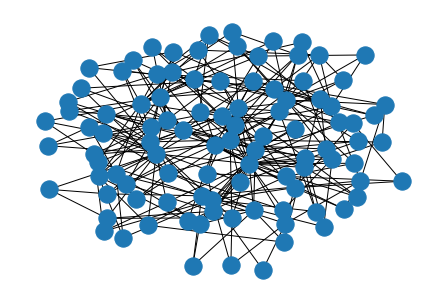

In [14]:
# use the networkx package to parse it and plot it
socialnet = nx.node_link_graph(network)
nx.draw_kamada_kawai(socialnet)

In [15]:
# get the genealogy tree
tree = game.getTree()

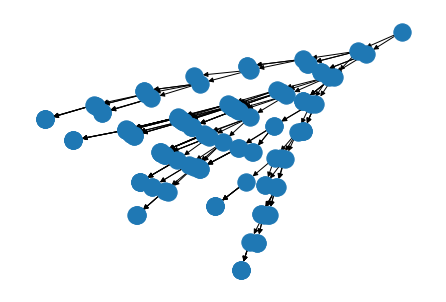

In [16]:
# use networkx to parse and plot it
genealogy = nx.tree_graph(tree)
nx.draw_kamada_kawai(genealogy)

In [17]:
# we can get hints every 6 seconds or so, let's grab a few rounds of hints
for i in np.arange(0,3):
    # this will give us just the new hints, but the object will store everything we've seen
    hints = game.getHints()
    if ('parts' in hints):
        print('we got '+str(len(hints['parts']))+' part hints')
    time.sleep(6)


# get all the hints we've collected
predHints = game.getAllPredictionHints()
partHints = game.getAllPartHints()

we got 138 part hints
we got 6 part hints
we got 6 part hints


In [33]:
predHints

[{'id': 115, 'time': 4, 'value': 16.334688238640943},
 {'id': 107, 'time': 40, 'value': 76.77468145216278},
 {'id': 95, 'time': 60, 'value': 38.6843725366036},
 {'id': 45, 'time': 76, 'value': 46.695902559678274},
 {'id': 74, 'time': 47, 'value': 95.4940818149542},
 {'id': 89, 'time': 64, 'value': 70.74223974734237},
 {'id': 48, 'time': 96, 'value': 62.17000869567456},
 {'id': 58, 'time': 10, 'value': 72.00353379576958},
 {'id': 88, 'time': 63, 'value': 84.05303919500045},
 {'id': 135, 'time': 72, 'value': 69.25237952911701},
 {'id': 92, 'time': 63, 'value': 66.30392240789746},
 {'id': 33, 'time': 80, 'value': 25.977173068478788},
 {'id': 14, 'time': 63, 'value': 58.74068148649103},
 {'id': 16, 'time': 9, 'value': 63.98762152322862},
 {'id': 137, 'time': 94, 'value': 46.95760118117301},
 {'id': 41, 'time': 94, 'value': 45.06635709772067},
 {'id': 143, 'time': 81, 'value': 61.87345131067833},
 {'id': 132, 'time': 25, 'value': 92.0332781361318},
 {'id': 4, 'time': 44, 'value': 48.0387541

In [18]:
# make the time hints into a dataframe
predhints_df = pd.read_json(json.dumps(predHints),orient='records')

In [19]:
# lets plot the data we got from all the robots
alt.Chart(predhints_df).mark_point().encode(
    x='time:Q',
    y='value:Q'
)

alt.Chart(...)

In [20]:
# we can tell the hacker we're interested in robots 99, 23 and 1
game.setRobotInterest([99,23,1])

# to reset to being interested in all, use
# game.setRobotInterest([])

{'Result': 'OK'}

In [21]:
# we can also tell the hacker we're interesed in the 'Astrogation Buffer Length','InfoCore Size'
game.setPartInterest(['Astrogation Buffer Length','InfoCore Size'])

# to reset to being interested in all, use
# game.setPartInterest([])

{'Result': 'OK'}

In [22]:
# if we get more hints now, they'll be biased to the robots and parts we care about

for i in np.arange(0,3):
    # this will give us just the new hints, but the object will store everything we've seen
    hints = game.getHints()
    if ('parts' in hints):
        print('we got '+str(len(hints['parts']))+' part hints')
    time.sleep(6)

we got 48 part hints
we got 6 part hints
we got 6 part hints


In [23]:
# to set our bets, feed in a dictionary with the values
# for example, let's set robot id 0 to 99 and robot 5 to 72
game.setBets({0:99,5:72})

{'Result': 'OK'}

In [24]:
# let's see how we're doing, grab the data
robots = game.getRobotInfo()

In [25]:
# let's see how team 2 is doing (might be 0 if no deadlines expired)
robots[robots.winner == 2]['Productivity'].sum()

1232.7320469457

In [37]:
robots[robots.winner == 2]

,id,name,expires,winner,Productivity
2,2,Wallminer Botberg Jr.,29.0,2,35.740069
4,4,Wallminer Botberg I,28.0,2,88.397152
16,16,Watervator Botson Jr.,22.0,2,83.013923
18,18,Waterwaller Botsky,28.0,2,100.000000
19,19,Waterwidget Boterson Jr.,28.0,2,-73.591280
22,22,Rockpulverizer Botberg,32.0,2,88.799514
26,26,Rockvator Botberg Jr.,33.0,2,100.000000
29,29,Pushwidget Botson,28.0,2,38.686413
30,30,Wallwidget Botsky,25.0,2,72.781823
37,37,Waterwidget Botson,21.0,2,-25.352515


In [26]:
# let's see how team 1 is doing (might be 0 if no deadlines expired or we didn't put in any bets)
robots[robots.winner == 1]['Productivity'].sum()

0.0

In [27]:
# Here's a hint on how you can use the data you get to predict the value.
# Let's say we learn two points about a robot's random number generator
# At time 17, they'll say 40 and at time 50, they'll say 27
xs = [17,50]
ys = [40,27]

In [28]:
# we can use this to generate simple regression. One way to do it is to just fit a one dimensional polynomial
fit = np.polyfit(xs,ys,1)

# in reality, 1 dimension is probably not ideal

In [29]:
# next, we'll want to figure out all the y values over the range of times 0 to 100
fitx = np.arange(0,100)
fity = []

In [30]:
# create the fit function using the fit we calculated above
fitfunc = np.poly1d(fit)
for x in fitx:
    y = fitfunc(x)
    if (y > 100): # we know y can't be > 100
        y = 100
    if (y < 0): # we know y can't be < 0
        y = 0
    fity.append(y)

In [31]:
# to visualize this, I'm going to build a dataset the has both the original numbers 
# our hacker gave us (17,50 and 40,27) and the new things we calculated:
vals = []
for i in np.arange(0,len(xs)):
    vals.append({'t':'hint','x':int(xs[i]),'y':int(ys[i])})
   
for i in np.arange(0,len(fitx)):
    vals.append({'t':'fit','x':int(fitx[i]),'y':int(fity[i])})

# so now we have a dataset with both the hint and fit data
# you can look at it here
# vals

In [32]:
# finally, let's plot the data using Altair

# first make a chart for the hints
hintlayer = alt.Chart(alt.Data(values=vals)).mark_circle(filled=True,size=90,color='red').encode(
    x='x:Q',
    y='y:Q',
    color='t:N'
).transform_filter(
    alt.datum.t == 'hint'
)

# overlay that with the predictions
fitlayer = alt.Chart(alt.Data(values=vals)).mark_line().encode(
    x='x:Q',
    y='y:Q',
    color='t:N'
).transform_filter(
    alt.datum.t == 'fit'
)

# and let's assume an expiration of 70 for this robot and draw a line on top

annotationlayer = alt.Chart(pd.DataFrame({'x': [70]})).mark_rule().encode(x='x:Q')

# layer the charts
hintlayer + fitlayer + annotationlayer


alt.LayerChart(...)